In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import the data

In [2]:
data = pd.read_csv('train.csv', encoding = "latin1",  skip_blank_lines = True, error_bad_lines=False,engine="python")
data

<ipython-input-2-0523dd78bc07>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('train.csv', encoding = "latin1",  skip_blank_lines = True, error_bad_lines=False,engine="python")
Skipping line 12: ',' expected after '"'
Skipping line 79: ',' expected after '"'
Skipping line 108: ',' expected after '"'
Skipping line 135: ',' expected after '"'
Skipping line 137: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead
Skipping line 163: ',' expected after '"'
Skipping line 475: ',' expected after '"'
Skipping line 662: ',' expected after '"'
Skipping line 702: ',' expected after '"'
Skipping line 759: ',' expected after '"'
Skipping line 809: ',' expected after '"'
Skipping line 1146: ',' expected after '"'
Skipping line 1149: ',' expected after '"'
Skipping line 1162: ',' expected after '"'
Skipping

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4863,0cd1e554d3672e9e,A simple article indicating its history will s...,0,0,0,0,0,0
4864,0cd26aab7a5fdfda,Hitler was innocent... \n\nThere are several g...,0,0,0,0,0,0
4865,0cd29f52aebb4750,YO B1TCH! \n\nyou absolute fuk1ng little b1tch...,1,1,1,0,1,0
4866,0cd2df1462b6388a,"""\nIn all my time working on celebrity bios, I...",0,0,0,0,0,0


In [3]:
# rom ydata_profiling import ProfileReport

In [4]:
# profile = ProfileReport(data, title="Profiling Report")
# profile

In [5]:
# find duplicate rows
duplicate_rows = data[data.duplicated()==True]
duplicate_rows

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
747,"|style=""""""""width: 50%; border:0; background-co...",None,None,None,None,None,None,None
757,|-,None,None,None,None,None,None,None
1226,|-,None,None,None,None,None,None,None
1227,"|style=""""""""color:#000""""""""|",None,None,None,None,None,None,None


In [6]:
# drop duplicate rows
data.drop_duplicates(inplace=True)
data.shape

(4864, 8)

In [7]:
data.isnull().sum()

id                0
comment_text     51
toxic            59
severe_toxic     63
obscene          64
threat           65
insult           66
identity_hate    70
dtype: int64

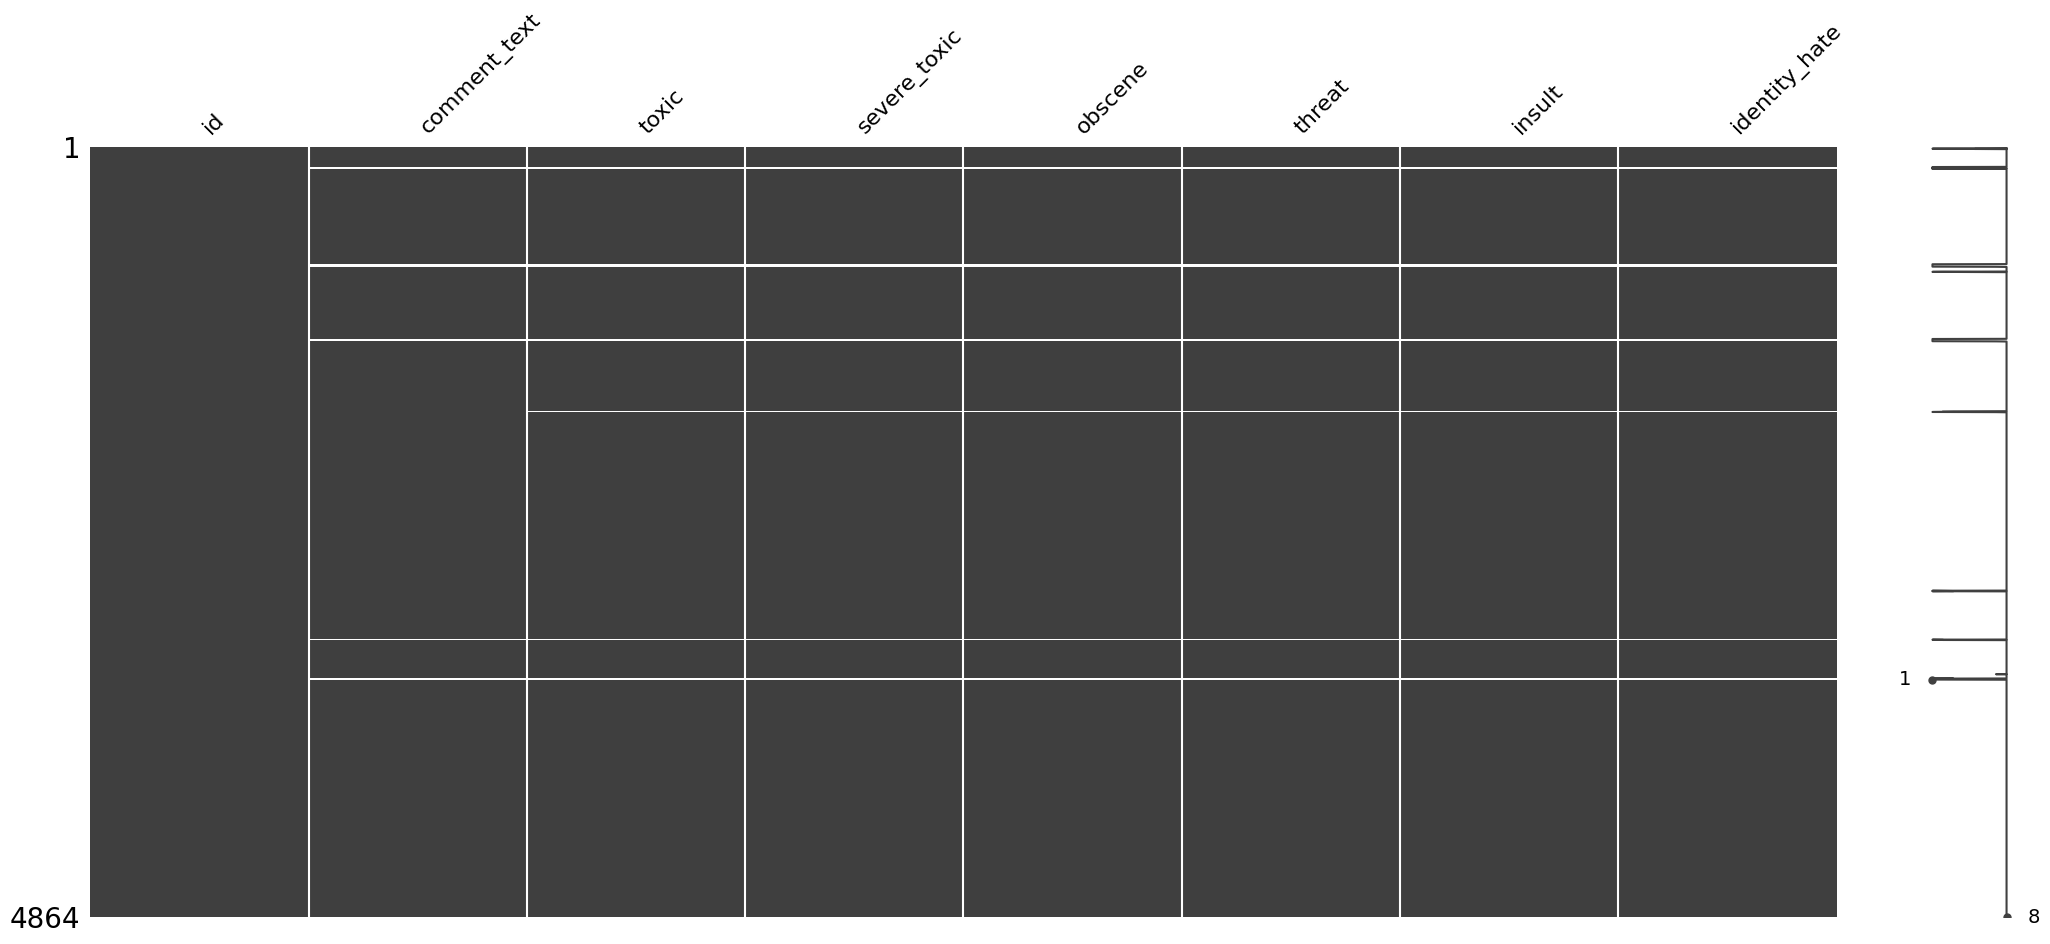

In [8]:
# visulaizing the null values
import missingno as msno
msno.matrix(data)
plt.show()

In [9]:
# dropping all rows with any missing values
data = data.dropna(axis=0, how= 'any', inplace= False).reset_index(drop=True)
data.shape

(4794, 8)

**dropping rows with non-numeric entries for the labels**

In [10]:
data.loc[(data['toxic']!='0')&
                   (data['toxic']!='1')]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
10,Thanks for uploading Image:Wonju.jpg. I notice...,so the copyright status is unclear. If you di...,then you will need to specify the owner of th...,then a link to the website from which it was ...,together with a restatement of that website's...,is usually sufficient information. However,if the copyright holder is different from the...,then their copyright should also be acknowled...
124,= My Famous Article ==witze happiness  wikip...,regardless of race,age,character or knowledge. The outside world kno...,and the honour of the Witzeman. For those who...,it has been said to have been a great honour,although the qualities needed for the job hav...,until they are called by former Witzemans via...


In [11]:
# drop colums here toxic is neither 0 nor 1
data = data.drop(data.loc[(data['toxic']!='0')&
                   (data['toxic']!='1')].index).reset_index(drop=True)
print(data.shape)

(4792, 8)


In [12]:
# checking for non-numeric enries in the remaining labels

print(data.loc[(data['severe_toxic']!='0')&
                   (data['severe_toxic']!='1')].shape)
print(data.loc[(data['obscene']!='0')&
                   (data['obscene']!='1')].shape)
print(data.loc[(data['threat']!='0')&
                   (data['threat']!='1')].shape)
print(data.loc[(data['insult']!='0')&
                   (data['insult']!='1')].shape)
print(data.loc[(data['identity_hate']!='0')&
                   (data['identity_hate']!='1')].shape)


(0, 8)
(0, 8)
(0, 8)
(0, 8)
(0, 8)


In [13]:
# checking for duplicate comment
duplicate_comment = data.loc[data['comment_text'].duplicated()==True]
duplicate_comment

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [14]:
# remove duplicate entry in comments column
data = data.drop_duplicates(subset=['comment_text'], keep='first')
data.shape

(4792, 8)


**$\color{green}{\text{creating a new column named toxicity to show multilabelling}}$**

In [15]:
df = data.copy()

In [16]:
data.loc[data['toxic']=='1', 'toxic'] = 'toxic'
data.loc[data['severe_toxic']=='1', 'severe_toxic'] = 'severe_toxic'
data.loc[data['obscene']=='1', 'obscene'] = 'obscene'
data.loc[data['threat']=='1', 'threat'] = 'threat'
data.loc[data['insult']=='1', 'insult'] = 'insult'
data.loc[data['identity_hate']=='1', 'identity_hate'] = 'identity_hate'

In [17]:
# creating a new column, the target variable with toxicity as column name
a = (data['toxic'].values+','+data['severe_toxic'].values+','+
     data['obscene'].values+','+data['threat'].values+','+data['insult'].values+','+data['identity_hate'].values)

target = list()
for i in range(0,len(data)):
    b = a[i].split(',')
    b = [x for x in b if x!='0']
    b = ','.join(b)
    target.append(b)
data['toxicity'] = target
data.loc[data['toxicity']=='', 'toxicity']= "non_toxic"

In [18]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxicity
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,non_toxic
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,non_toxic
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,non_toxic
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,non_toxic
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,non_toxic


In [19]:
# including the column toxicity to the original dataframe df
df['toxicity']=data['toxicity']
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxicity
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,non_toxic
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,non_toxic
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,non_toxic
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,non_toxic
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,non_toxic


In [20]:
# changing the datatype of the labels (toxic, severe_toxic, obscene, threat, insult, identity_hate)
col_name = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df[col_name] = df[col_name].astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4792 entries, 0 to 4791
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             4792 non-null   object
 1   comment_text   4792 non-null   object
 2   toxic          4792 non-null   int64 
 3   severe_toxic   4792 non-null   int64 
 4   obscene        4792 non-null   int64 
 5   threat         4792 non-null   int64 
 6   insult         4792 non-null   int64 
 7   identity_hate  4792 non-null   int64 
 8   toxicity       4792 non-null   object
dtypes: int64(6), object(3)
memory usage: 374.4+ KB


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
toxic,4792.0,0.101836,0.302465,0.0,0.0,0.0,0.0,1.0
severe_toxic,4792.0,0.010225,0.100613,0.0,0.0,0.0,0.0,1.0
obscene,4792.0,0.054674,0.227367,0.0,0.0,0.0,0.0,1.0
threat,4792.0,0.003965,0.062849,0.0,0.0,0.0,0.0,1.0
insult,4792.0,0.055092,0.228183,0.0,0.0,0.0,0.0,1.0
identity_hate,4792.0,0.010225,0.100613,0.0,0.0,0.0,0.0,1.0


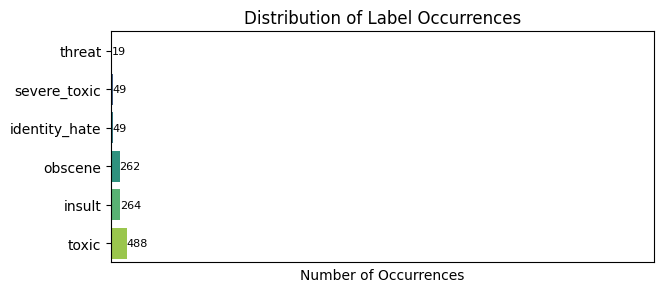

In [23]:
# Visualizing the class distribution of the 'label' column
column_labels = df.columns.tolist()[2:-1]
label_counts = df[column_labels].sum().sort_values()

plt.figure(figsize=(7, 3))
ax = sns.barplot(x=label_counts.values,
                 y=label_counts.index, palette='viridis')
plt.xlabel('Number of Occurrences')
plt.title('Distribution of Label Occurrences')
ax.bar_label(ax.containers[0], fontsize = 8)
plt.xticks(ticks=[])
plt.xlim(0,17000)
# Show the plot
plt.show()

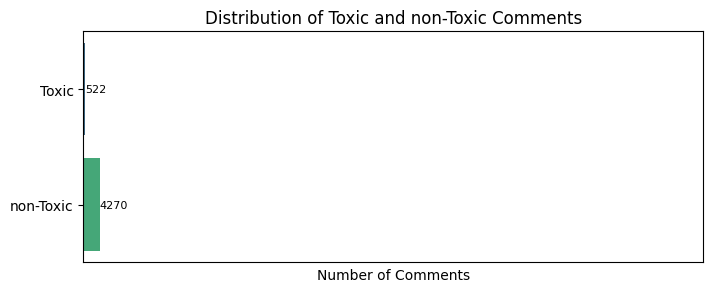

In [24]:
# toxic and non toxic data
toxic_comm = df.loc[df[column_labels].sum(axis=1) > 0]
non_toxic_comm = df.loc[df[column_labels].sum(axis=1) == 0]

# Number of toxic and clean comments
num_toxic = len(toxic_comm)
num_clean = len(non_toxic_comm)

# Create DataFrame
plot_data = pd.DataFrame(
    {'Category': ['Toxic', 'non-Toxic'], 'Count': [num_toxic, num_clean]})

# creating a plot
plt.figure(figsize=(8, 3))
ax = sns.barplot(x='Count', y='Category', data=plot_data, palette='viridis')
plt.xlabel('Number of Comments')
plt.ylabel('')
plt.title('Distribution of Toxic and non-Toxic Comments')
ax.bar_label(ax.containers[0], fontsize = 8)
plt.xticks(ticks=[])
plt.xlim(0,160000)
plt.show()


In [25]:
df.loc[df['toxicity']!='non_toxic','toxicity']



6        toxic,severe_toxic,obscene,insult
11                                   toxic
15                                   toxic
41      toxic,obscene,insult,identity_hate
42                    toxic,obscene,insult
                       ...                
4729                                 toxic
4740                  toxic,obscene,insult
4745                                 toxic
4766                                 toxic
4789     toxic,severe_toxic,obscene,insult
Name: toxicity, Length: 522, dtype: object

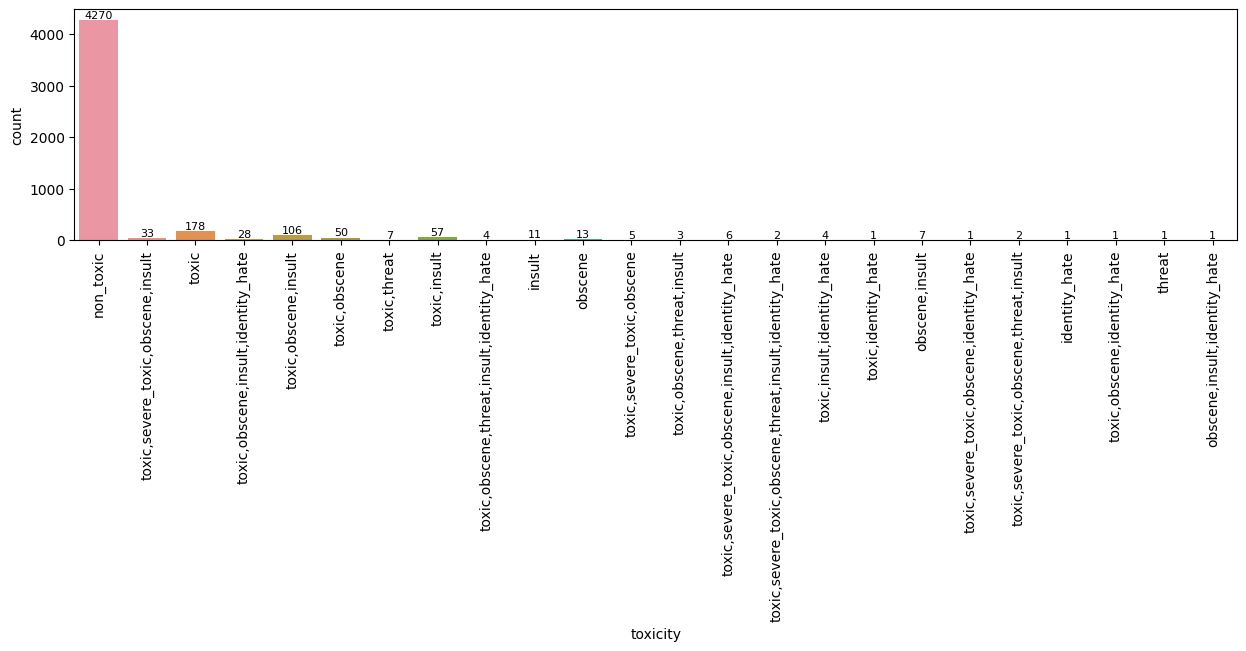

In [26]:
# toxicity plot
plt.figure(figsize=(15,3))
ax = sns.countplot(x = 'toxicity', data = df)
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], fontsize = 8)
plt.show()

**Conclusions from the data preprocessing**  
**1) The data is imbalanced, as there are about 88% comments that are non-toxic.**   
**2) The problem comes under the multilable, binary classification as a comment can have multiple lables.**

So in order to balance the data, we took random samples from the non-toxic data to match the size of toxic data

# text cleaning

In [27]:
import re
import nltk
import spacy # language models
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')

my_stop_words = stopwords.words('english')

print(len(my_stop_words))
my_stop_words.extend(['make','see','people','tell','see','give','please','take','would','think','try','good','life',
                      'really','use','want','need','one','article','like','stop','page','time','delete','edit','wikipedia',
                      'even','thing','come','way','man','make','go','get','well','see','know','wiki','org','little',
                      'stop','stephen','hawk','people','u','real','tme','call','right','need','wikize',
                      'nothing','name','leave','admin','back','never','day','find','world','read','say',
                      'talk','keep','put','fact','work','user','change','post','anything','let','world','big',
                      'hope','head','face','ur','ever','talk','piece','mean','comment','write','also','day',
                      'en','love','much','house','watch','look','much','let', 'person','thank','every','could','show','p','source','oh','new','add','still','care','editor',
                      'problem','source','information','friend','something','since','actully','many','someone','site',
                      'long','history','live','reason','place','another','word','show','around','point','revert','around',
                      'family','shall','wish','continue','maybe','must','else','eat','understand','account','boy', 'seriously','sure',
                      'remove','actually','message','guy','first','seem','anyone','guess','believe'])

print(len(my_stop_words))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


179
330


In [28]:
df['comment_text'] = [x.strip() for x in df['comment_text']] # remove both the leading and the trailing characters
text = df['comment_text'].tolist()

In [85]:
import re
import string
def  clean_text(text):
    text =  text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r'doesnt','does not',text)
    text = re.sub('[-()"#/@;{}`+=~|.!?,]+', " ", text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*', ' ', text)
    text = re.sub("[^A-Za-z" "]+"," ",text)
    text = re.sub("http",'', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub("(\W)"," ",text)
    return text

In [32]:
print(clean_text("I am a fucking few that is 87"))

i am a fucking few that is 


**proceccing the sampled dataframe**


In [33]:
# removing repeated words from the text
text1=list()
for entry in text:
    entry_new = ' '.join(dict.fromkeys(entry.split()))
    text1.append(entry_new)

In [34]:
# text cleaning
import string
text2 = list()
for line in text1:
    line = clean_text(line)
    text2.append(line)

In [35]:
#text lemmatization
def lemmi(seq):
    doc = nlp(' '.join(seq))
    lemmas = [token.lemma_ for token in doc]
    return lemmas

In [36]:
text3 = list()
for line in text2:
    txt = line.split()
    txt_stop = [word for word in txt if not word in my_stop_words]
    text = lemmi(txt_stop)
    text3.append(' '.join(text))

In [37]:
df['comment_text']=text3
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxicity
0,0000997932d777bf,explanation edit make username hardcore metall...,0,0,0,0,0,0,non_toxic
1,000103f0d9cfb60f,aww match background colour seemingly stick th...,0,0,0,0,0,0,non_toxic
2,000113f07ec002fd,hey try war constantly remove relevant talking...,0,0,0,0,0,0,non_toxic
3,0001b41b1c6bb37e,suggestion improvement wonder section statisti...,0,0,0,0,0,0,non_toxic
4,0001d958c54c6e35,sir hero chance remember,0,0,0,0,0,0,non_toxic


# visulaization through word cloud

In [38]:
# Storing each categories of non clean comments in specific arrays
toxic = word_tokenize(df[df.toxic==1]['comment_text'].values.sum())
severe_toxic = word_tokenize(df[df.severe_toxic==1]['comment_text'].values.sum())
obscene = word_tokenize(df[df.obscene==1]['comment_text'].values.sum())
threat = word_tokenize(df[df.threat==1]['comment_text'].values.sum())
insult= word_tokenize(df[df.insult==1]['comment_text'].values.sum())
identity_hate = word_tokenize(df[df.identity_hate==1]['comment_text'].values.sum())

In [39]:
nlp.max_length = 10030000


(-0.5, 399.5, 199.5, -0.5)

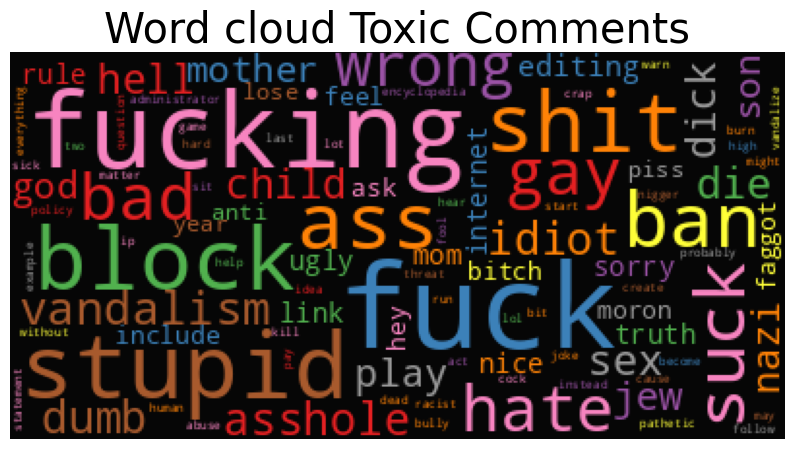

In [40]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(10,10))
wc = WordCloud(background_color="black", max_words=100,stopwords=my_stop_words, max_font_size= 60)
wc.generate(" ".join(toxic))
plt.title("Word cloud Toxic Comments", fontsize=30)
plt.imshow(wc.recolor( colormap= 'Set1' , random_state=1), alpha=0.98)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

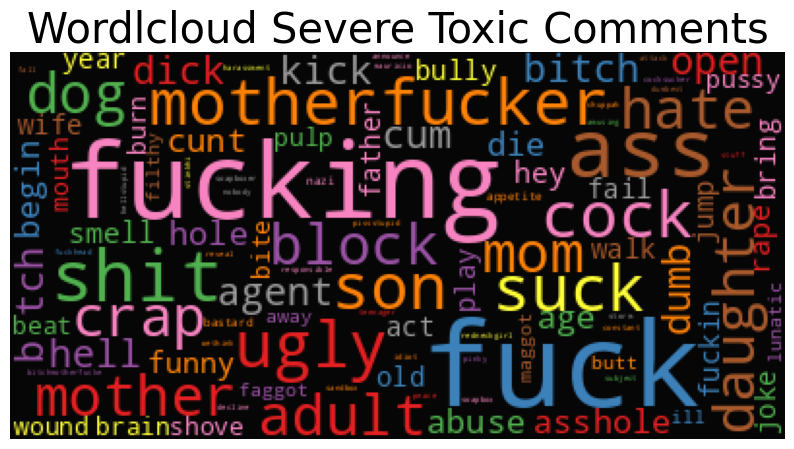

In [41]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(10,10))
wc = WordCloud(background_color="black", stopwords=my_stop_words,max_words=100, max_font_size= 60)
wc.generate(" ".join(severe_toxic))
plt.title("Wordlcloud Severe Toxic Comments", fontsize=30)
plt.imshow(wc.recolor( colormap= 'Set1' , random_state=1), alpha=0.98)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

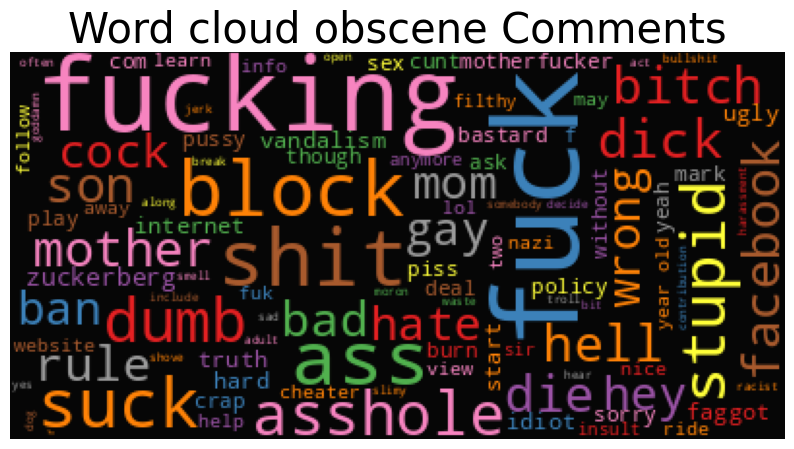

In [42]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(10,10))
wc = WordCloud(background_color="black",stopwords=my_stop_words, max_words=100, max_font_size= 60)
wc.generate(" ".join(obscene))
plt.title("Word cloud obscene Comments", fontsize=30)
plt.imshow(wc.recolor( colormap= 'Set1' , random_state=1), alpha=0.98)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

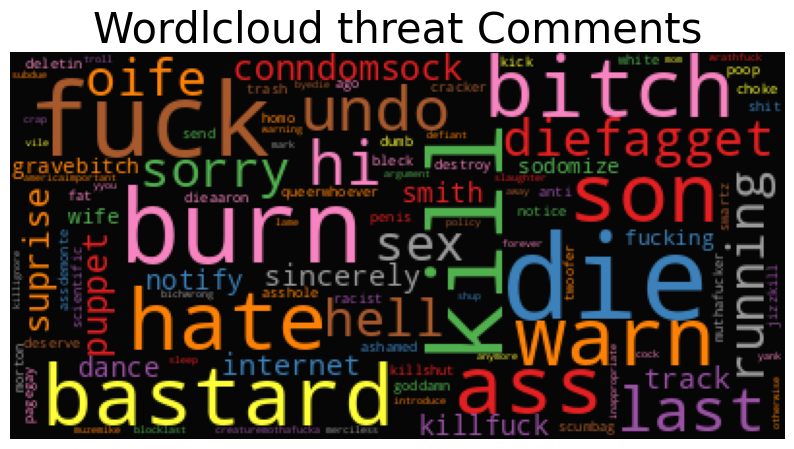

In [43]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(10,10))
wc = WordCloud(background_color="black",stopwords=my_stop_words, max_words=100, max_font_size= 60)
wc.generate(" ".join(threat))
plt.title("Wordlcloud threat Comments", fontsize=30)
plt.imshow(wc.recolor( colormap= 'Set1' , random_state=1), alpha=0.98)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

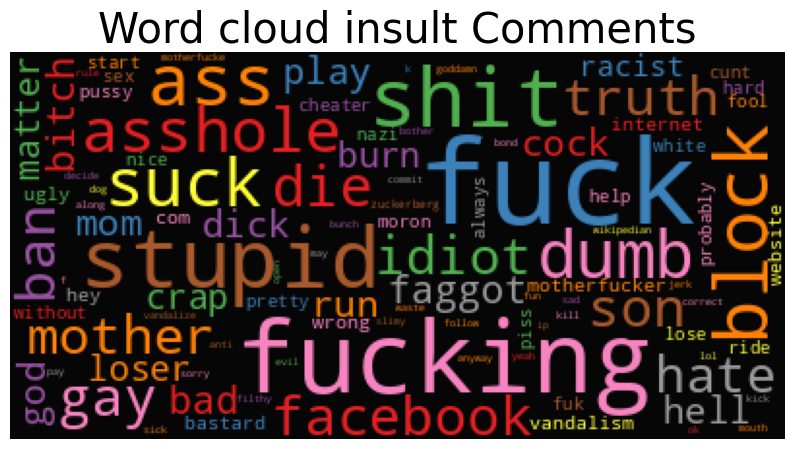

In [44]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(10,10))
wc = WordCloud(background_color="black",stopwords=my_stop_words, max_words=100, max_font_size= 60)
wc.generate(" ".join(insult))
plt.title("Word cloud insult Comments", fontsize=30)
plt.imshow(wc.recolor( colormap= 'Set1' , random_state=1), alpha=0.98)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

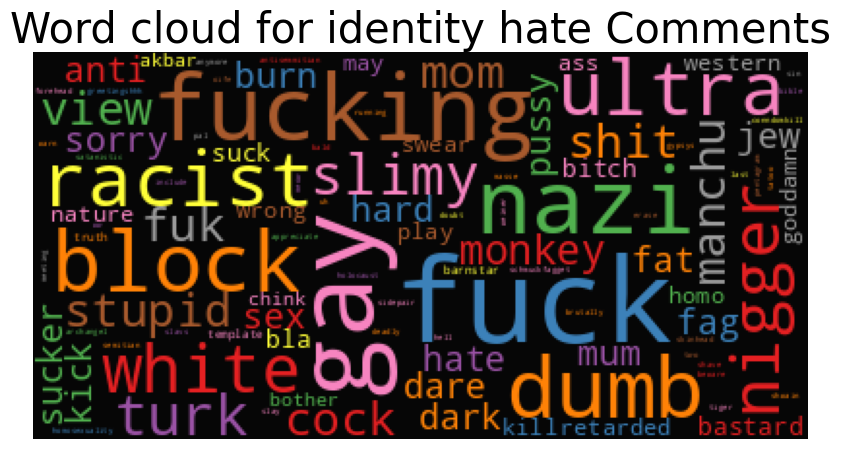

In [45]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(10,10))
wc = WordCloud(background_color="black",stopwords=my_stop_words, max_words=100, max_font_size= 60)
wc.generate(" ".join(identity_hate))
plt.title("Word cloud for identity hate Comments", fontsize=30)
plt.imshow(wc.recolor( colormap= 'Set1' , random_state=1), alpha=0.98)
plt.axis('off')

**it can be seen in the word cloud as well that different labels in the dataset shares vocabulary**

# data splitting and feature extraction

In [46]:

X = df['comment_text']
Y = df[df.columns[2:-1]].values
Y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [47]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
max_features = 20000  # number of words in the vacab,
max_len = 100 # Sequence length to pad the outputs to.

vectorizer = TextVectorization(max_tokens = max_features,
                                    output_sequence_length = max_len,
                                    output_mode = 'int')   # this means that it is going to map every single word to an integer value
vectorizer.adapt(X)

vectorized_text = vectorizer(X.values)
vectorized_text

import numpy as np
x_new = np.array(vectorized_text)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_new, Y, test_size= 0.3)
print(X_train.shape)
print(y_train.shape)

(3354, 100)
(3354, 6)


In [48]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vect = TfidfVectorizer(min_df = 20, max_df = 20000,stop_words=my_stop_words,
#                              analyzer='word',sublinear_tf = True, ngram_range = (1, 3))
# #vect = vectorizer.fit(list(df_sampled.loc[df_sampled.toxicity!='non_toxic', 'comment_text']))
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3)
# print(X_train.shape)
# print(y_train.shape)
# X_train = vect.fit_transform(X_train)
# X_test = vect.transform(X_test)

# multi label classification: model building

# 1. OneVsRestClassifier

In [49]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB

model1 = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, max_features=None,random_state = 0,
                                                    n_jobs =-1))
#model = OneVsRestClassifier (MultinomialNB())
#model = OneVsRestClassifier (SVC())
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

In [51]:
# model evaluation
#classification report
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score ,confusion_matrix
cols_target = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
cr = pd.DataFrame(classification_report(y_test,y_pred, target_names=cols_target,output_dict=True)).T
cr['support'] = cr.support.apply(int)
print("roc_score : ",roc_auc_score(y_test, y_pred))
cr.style.background_gradient(cmap='viridis')

roc_score :  0.5171562664522016


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
toxic,0.642857,0.061224,0.111801,147
severe_toxic,0.000000,0.000000,0.000000,8
obscene,0.888889,0.098765,0.177778,81
threat,0.000000,0.000000,0.000000,4
insult,0.444444,0.055556,0.098765,72
identity_hate,0.000000,0.000000,0.000000,11
micro avg,0.617647,0.065015,0.117647,323
macro avg,0.329365,0.035924,0.064724,323
weighted avg,0.614551,0.065015,0.117480,323
samples avg,0.005563,0.005158,0.005047,323


In [52]:
from xgboost import XGBClassifier

model2 = OneVsRestClassifier(XGBClassifier(n_estimators=100, max_depth=11, scale_pos_weight = 1,
                                          eval_metric = 'auc',max_features=None,colsample_bytree = 0.2,
                                          random_state = 0, n_jobs =-1))
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)

In [53]:
# model evaluation
#classification report
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score ,confusion_matrix
cols_target = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
cr = pd.DataFrame(classification_report(y_test,y_pred, target_names=cols_target,output_dict=True)).T
cr['support'] = cr.support.apply(int)
print("roc_score : ",roc_auc_score(y_test, y_pred))
cr.style.background_gradient(cmap='viridis')


roc_score :  0.5231642678493097


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
toxic,0.565217,0.088435,0.152941,147
severe_toxic,0.000000,0.000000,0.000000,8
obscene,0.666667,0.123457,0.208333,81
threat,0.000000,0.000000,0.000000,4
insult,0.461538,0.083333,0.141176,72
identity_hate,0.000000,0.000000,0.000000,11
micro avg,0.557692,0.089783,0.154667,323
macro avg,0.282237,0.049204,0.083742,323
weighted avg,0.527299,0.089783,0.153319,323
samples avg,0.009968,0.007360,0.007746,323


In [54]:
# extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier
model3 = OneVsRestClassifier(ExtraTreesClassifier(n_estimators=100,
                                                 random_state = 0,bootstrap= True, n_jobs =-1))
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)

In [55]:
# model evaluation
#classification report
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score ,confusion_matrix
cols_target = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
cr = pd.DataFrame(classification_report(y_test,y_pred, target_names=cols_target,output_dict=True)).T
cr['support'] = cr.support.apply(int)
print("roc_score : ",roc_auc_score(y_test, y_pred))
cr.style.background_gradient(cmap='viridis')

roc_score :  0.5023203711107933


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
toxic,0.250000,0.006803,0.013245,147
severe_toxic,0.000000,0.000000,0.000000,8
obscene,0.500000,0.012346,0.024096,81
threat,0.000000,0.000000,0.000000,4
insult,0.500000,0.013889,0.027027,72
identity_hate,0.000000,0.000000,0.000000,11
micro avg,0.300000,0.009288,0.018018,323
macro avg,0.208333,0.005506,0.010728,323
weighted avg,0.350619,0.009288,0.018095,323
samples avg,0.000695,0.000522,0.000596,323


# 3. LSTM model

In [56]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
from tensorflow.keras.metrics import Precision, Recall, F1Score



In [57]:
# MCSHBAP => map, cache, shuffle, batch, prefetch
# from_tensor_slices or list_files

dataset = tensorflow.data.Dataset.from_tensor_slices((vectorized_text, Y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)  # how large our buffer size needs to be
dataset = dataset.batch(16)  # each batch represented as a series of 16 samples
dataset = dataset.prefetch(8)  # helps prevent bottlenecks

In [58]:
one_batch = dataset.as_numpy_iterator().next()    # batch of 16 training example
one_batch

(array([[  956,  1811,   434, ...,     0,     0,     0],
        [18639,   840,    74, ...,     0,     0,     0],
        [ 1350,   396,   705, ...,     0,     0,     0],
        ...,
        [  171,   812,    14, ...,     0,     0,     0],
        [15180,     0,     0, ...,     0,     0,     0],
        [ 1239,     0,     0, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [59]:
print(f'The dataset contains {len(dataset)} batch')
train = dataset.take(int(len(dataset)*.9))   # 90%
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.05))   # 5%
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.05))  # 5%
print('lenth of train, validation and test :',len(train), len(val), len(test))

The dataset contains 300 batch
lenth of train, validation and test : 270 15 15


In [60]:
model = Sequential()
# Create the embedding layer
model.add(Embedding(max_features+1, 32))

# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))

# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Final layer
model.add(Dense(6, activation='sigmoid'))
model.compile(optimizer='Adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

In [61]:
# model training
hist = model.fit(train, epochs=3, validation_data= val, verbose=1)

Epoch 1/3
270/270 [==============================] - 31s 96ms/step - loss: 0.1537 - accuracy: 0.9454 - val_loss: 0.0871 - val_accuracy: 0.9917
Epoch 2/3
270/270 [==============================] - 25s 93ms/step - loss: 0.0657 - accuracy: 0.9868 - val_loss: 0.0422 - val_accuracy: 0.9958
Epoch 3/3
270/270 [==============================] - 26s 97ms/step - loss: 0.0462 - accuracy: 0.7792 - val_loss: 0.0393 - val_accuracy: 0.9958


In [62]:
# model evaluation
loss, Acc = model.evaluate(test)

print('Test Loss: ', loss)
print('Test Accuracy: ', Acc)

15/15 [==============================] - 0s 17ms/step - loss: 0.0496 - accuracy: 0.9875
Test Loss:  0.0496431440114975
Test Accuracy:  0.987500011920929


In [63]:
# calculating precision and recall
pre = Precision()
re = Recall()
for batch in test.as_numpy_iterator():
    # unpack the batch
    X_test, y_test = batch
    # make a prediction
    y_pred = model.predict(X_test)

    y_test = y_test.flatten()
    y_pred = y_pred.flatten()

    pre.update_state(y_test, y_pred)
    re.update_state(y_test, y_pred)


1/1 [==============================] - 0s 32ms/step


In [64]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}')

Precision: 0.9750000238418579, Recall:0.6724137663841248


In [65]:
#make prediction
input_text = vectorizer('You freaking jew! I am going to hit you.')
res = model.predict(np.expand_dims(input_text, axis=0))
(res > 0.5).astype(int)

1/1 [==============================] - 0s 32ms/step


array([[1, 0, 0, 0, 0, 0]])

In [66]:
#make prediction
input_text = vectorizer('You fucking jew! I am going to hit you.')
res = model1.predict(np.expand_dims(input_text, axis=0))
(res > 0.5).astype(int)

array([[0, 0, 0, 0, 0, 0]])

In [67]:
#make prediction
input_text = vectorizer('You fucking jew! I am going to hit you.')
res = model2.predict(np.expand_dims(input_text, axis=0))
(res > 0.5).astype(int)

array([[0, 0, 0, 0, 0, 0]])

# **With resampling**

In [68]:
# dropping these rows is giving better classification with the Random forest Classifier
df = df.drop(df.loc[df['toxicity']=='toxic'].index).reset_index(drop=True)
# Randomly sample non-toxic comments
toxic_df = df.loc[df['toxicity']!='non_toxic']
clean_sampled = df.loc[df['toxicity']=='non_toxic'].sample(n=toxic_df.shape[0], random_state=42)
df_sampled = pd.concat([toxic_df, clean_sampled], axis=0)

# Shuffle the data to avoid any order bias during training
df_sampled = df_sampled.sample(frac=1, random_state=42)

print(toxic_df.shape)
print(clean_sampled.shape)
print(df_sampled.shape)
df_sampled.head()

(344, 9)
(344, 9)
(688, 9)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxicity
3907,0af917a314be5d46,ahem wtf talk sire practice vandalism,0,0,1,0,0,0,obscene
2686,07983af8eaf6b884,subst nn warn al berkowitz edit,0,0,0,0,0,0,non_toxic
3511,09e42c1742c9a50c,ew f g nature disgust you re woman sexism wron...,1,0,1,0,0,1,"toxic,obscene,identity_hate"
4503,0c888087108ada34,ekgograf son bitch gang dumb n zi greatest bat...,1,0,1,0,1,1,"toxic,obscene,insult,identity_hate"
4360,0c28d73a0a173c8a,hell rubbish,1,0,0,0,1,0,"toxic,insult"


In [69]:
X1 = df_sampled['comment_text']
Y1 = df_sampled[df_sampled.columns[2:-1]].values


In [70]:
max_features = 20000  # number of words in the vacab,
max_len = 100 # Sequence length to pad the outputs to.

vectorizer = TextVectorization(max_tokens = max_features,
                                    output_sequence_length = max_len,
                                    output_mode = 'int')   # this means that it is going to map every single word to an integer value
vectorizer.adapt(X1)

vectorized_text1 = vectorizer(X1.values)
vectorized_text1

import numpy as np
x_new1 = np.array(vectorized_text1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_new1, Y1, test_size= 0.3)
print(X_train.shape)
print(y_train.shape)

(481, 100)
(481, 6)


In [71]:
model1 = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, max_features=None,random_state = 0,
                                                    n_jobs =-1))
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

# model evaluation
#classification report
cols_target = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
cr = pd.DataFrame(classification_report(y_test,y_pred, target_names=cols_target,output_dict=True)).T
cr['support'] = cr.support.apply(int)
print("roc_score : ",roc_auc_score(y_test, y_pred))
cr.style.background_gradient(cmap='viridis')

roc_score :  0.5684024363820955


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
toxic,0.676056,0.494845,0.571429,97
severe_toxic,1.000000,0.055556,0.105263,18
obscene,0.750000,0.439024,0.553846,82
threat,0.000000,0.000000,0.000000,7
insult,0.526316,0.375000,0.437956,80
identity_hate,0.000000,0.000000,0.000000,14
micro avg,0.631868,0.385906,0.479167,298
macro avg,0.492062,0.227404,0.278082,298
weighted avg,0.628130,0.385906,0.462333,298
samples avg,0.255233,0.191465,0.205544,298


In [72]:
from xgboost import XGBClassifier

model2 = OneVsRestClassifier(XGBClassifier(n_estimators=100, max_depth=11, scale_pos_weight = 1,
                                          eval_metric = 'auc',max_features=None,colsample_bytree = 0.2,
                                          random_state = 0, n_jobs =-1))
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)

# model evaluation
#classification report
cols_target = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
cr = pd.DataFrame(classification_report(y_test,y_pred, target_names=cols_target,output_dict=True)).T
cr['support'] = cr.support.apply(int)
print(f"Test Set Accuracy : {accuracy_score( y_test, y_pred) * 100} %\n")
print("roc_score : ",roc_auc_score(y_test, y_pred))
cr.style.background_gradient(cmap='viridis')

Test Set Accuracy : 35.748792270531396 %

roc_score :  0.5632937168103758


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
toxic,0.626667,0.484536,0.546512,97
severe_toxic,0.000000,0.000000,0.000000,18
obscene,0.696429,0.475610,0.565217,82
threat,0.000000,0.000000,0.000000,7
insult,0.568966,0.412500,0.478261,80
identity_hate,0.000000,0.000000,0.000000,14
micro avg,0.613402,0.399329,0.483740,298
macro avg,0.315343,0.228774,0.264998,298
weighted avg,0.548359,0.399329,0.461813,298
samples avg,0.278583,0.200564,0.219059,298


## **LSTM**

In [73]:
# MCSHBAP => map, cache, shuffle, batch, prefetch
# from_tensor_slices or list_files

dataset = tensorflow.data.Dataset.from_tensor_slices((vectorized_text1, Y1))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)  # how large our buffer size needs to be
dataset = dataset.batch(16)  # each batch represented as a series of 16 samples
dataset = dataset.prefetch(8)  # helps prevent bottlenecks

In [74]:
train = dataset.take(int(len(dataset)*.9))   # 90%
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.05))   # 5%
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.05))  # 5%
print('lenth of train, validation and test :',len(train), len(val), len(test))

lenth of train, validation and test : 38 2 2


In [75]:
model = Sequential()
# Create the embedding layer
model.add(Embedding(max_features+1, 32))

# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))

# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Final layer
model.add(Dense(6, activation='sigmoid'))
model.compile(optimizer='Adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

# model training
hist = model.fit(train, epochs=3, validation_data= val, verbose=1)
# model evaluation
loss, Acc = model.evaluate(test)

print('Test Loss: ', loss)
print('Test Accuracy: ', Acc)

Epoch 1/3
38/38 [==============================] - 9s 105ms/step - loss: 0.5333 - accuracy: 0.6743 - val_loss: 0.5180 - val_accuracy: 0.0000e+00
Epoch 2/3
38/38 [==============================] - 4s 96ms/step - loss: 0.4423 - accuracy: 0.8273 - val_loss: 0.4318 - val_accuracy: 0.9062
Epoch 3/3
2/2 [==============================] - 0s 22ms/step - loss: 0.2004 - accuracy: 1.0000
Test Loss:  0.20041893422603607
Test Accuracy:  1.0


In [76]:
# calculating precision and recall
pre = Precision()
re = Recall()
for batch in test.as_numpy_iterator():
    # unpack the batch
    X_test, y_test = batch
    # make a prediction
    y_pred = model.predict(X_test)

    y_test = y_test.flatten()
    y_pred = y_pred.flatten()

    pre.update_state(y_test, y_pred)
    re.update_state(y_test, y_pred)

1/1 [==============================] - 0s 32ms/step


In [77]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}')

Precision: 0.8636363744735718, Recall:0.44186046719551086


In [78]:
#make prediction
input_text = vectorizer('You freaking jew! I am going to hit you.')
res = model.predict(np.expand_dims(input_text, axis=0))
(res > 0.5).astype(int)

1/1 [==============================] - 0s 29ms/step


array([[1, 0, 0, 0, 0, 0]])

## different text **vectorization**

In [79]:
X2 = df_sampled['comment_text']
Y2 = df_sampled[df_sampled.columns[2:-1]].values
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size= 0.3)


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 20, max_df = 20000,stop_words=my_stop_words,
                             analyzer='word',sublinear_tf = True, ngram_range = (1, 3))
X_tfidf = vectorizer.fit(list(df_sampled.loc[df_sampled.toxicity!='non_toxic', 'comment_text']))
X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print(len(vectorizer.get_feature_names_out()))
print(list(vectorizer.get_feature_names_out()))

8
['ass', 'bitch', 'block', 'fuck', 'fucking', 'shit', 'stupid', 'suck']


In [81]:
from xgboost import XGBClassifier

model2 = OneVsRestClassifier(XGBClassifier(n_estimators=100, max_depth=11, scale_pos_weight = 1,
                                          eval_metric = 'auc',max_features=None,colsample_bytree = 0.3,
                                          random_state = 0, n_jobs =-1))
model2.fit(X_train_tfidf,y_train)
y_pred = model2.predict(X_test_tfidf)

# model evaluation
#classification report
cols_target = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
cr = pd.DataFrame(classification_report(y_test,y_pred, target_names=cols_target,output_dict=True)).T
cr['support'] = cr.support.apply(int)
print(f"Test Set Accuracy : {accuracy_score( y_test, y_pred) * 100} %\n")
print("roc_score : ",roc_auc_score(y_test, y_pred))
cr.style.background_gradient(cmap='viridis')

Test Set Accuracy : 64.73429951690821 %

roc_score :  0.6441128628701402


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
toxic,0.918033,0.629213,0.746667,89
severe_toxic,0.000000,0.000000,0.000000,12
obscene,0.981132,0.675325,0.800000,77
threat,0.000000,0.000000,0.000000,5
insult,0.783333,0.587500,0.671429,80
identity_hate,0.000000,0.000000,0.000000,14
micro avg,0.880682,0.559567,0.684327,277
macro avg,0.447083,0.315340,0.369683,277
weighted avg,0.793931,0.559567,0.656201,277
samples avg,0.259259,0.257729,0.251564,277


In [82]:
import nltk
from nltk.corpus import stopwords
stop_words =stopwords.words('english')

stop_words.extend(['make','see','people','tell','see','give','please','take','would','think','try','good','life',
                      'really','use','want','need','one','article','like','stop','page','time','delete','edit','wikipedia',
                      'even','thing','come','way','man','make','go','get','well','see','know','wiki','org','little',
                      'stop','stephen','hawk','people','u','real','tme','call','right','need','wikize',
                      'nothing','name','leave','admin','back','never','day','find','world','read','say',
                      'talk','keep','put','fact','work','user','change','post','anything','let','world','big',
                      'hope','head','face','ur','ever','talk','piece','mean','comment','write','also','day',
                      'en','love','much','house','watch','look','much','let', 'person','thank','every','could','show','p','source','oh','new','add','still','care','editor',
                      'problem','source','information','friend','something','since','actully','many','someone','site',
                      'long','history','live','reason','place','another','word','show','around','point','revert','around',
                      'family','shall','wish','continue','maybe','must','else','eat','understand','account','boy', 'seriously','sure',
                      'remove','actually','message','guy','first','seem','anyone','guess','believe','is'])

In [83]:
def stopwords(text):
  list =text.split()
  #print(list)
  for word in list:
    txt_stop=[word for word in list if word not in stop_words]
    doc = nlp(' '.join(txt_stop))
    lemmas = [token.lemma_ for token in doc]
    return (' '.join(lemmas))

[0.28265724 0.02840232 0.18129976 0.02856475 0.24001724 0.05788633]
0.81882762350142


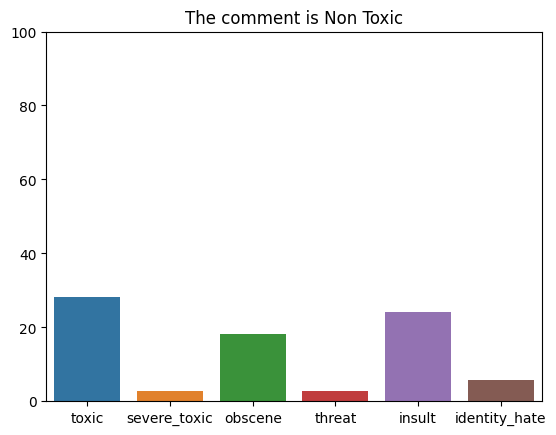

In [86]:
def make_test_predictions(df,classifier):

    df.comment_text = df.comment_text.apply(clean_text)
    df.comment_text = df.comment_text.apply(stopwords)

    X_test = df.comment_text

    X_test_transformed = vectorizer.transform(X_test)

    y_test_pred = classifier.predict_proba(X_test_transformed)

    a = np.array(y_test_pred[0])
    print(a)

    sns.barplot(x = cols_target,y =a*100)

    plt.ylim((0,100))

    result =  sum(y_test_pred[0])
    print(result)
    if result >= 1:

       plt.title('The comment is Toxic')


    else :

      plt.title('The comment is Non Toxic')
#Enter the comment
comment_text = "He is a really smart"

comment ={'id':[1],'comment_text':[comment_text]}

comment = pd.DataFrame(comment)

make_test_predictions(comment,model2)

[0.9306358  0.01934016 0.27934188 0.02856475 0.92810774 0.07445886]
2.2604491878300905


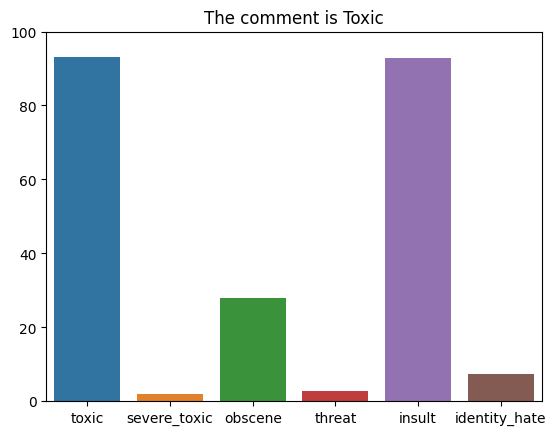

In [87]:
def make_test_predictions(df,classifier):

    df.comment_text = df.comment_text.apply(clean_text)
    df.comment_text = df.comment_text.apply(stopwords)

    X_test = df.comment_text

    X_test_transformed = vectorizer.transform(X_test)

    y_test_pred = classifier.predict_proba(X_test_transformed)

    a = np.array(y_test_pred[0])
    print(a)

    sns.barplot(x = cols_target,y =a*100)

    plt.ylim((0,100))

    result =  sum(y_test_pred[0])
    print(result)
    if result >= 1:

       plt.title('The comment is Toxic')


    else :

      plt.title('The comment is Non Toxic')
#Enter the comment
comment_text = "He is so stupid"

comment ={'id':[1],'comment_text':[comment_text]}

comment = pd.DataFrame(comment)

make_test_predictions(comment,model2)

In [94]:
import pickle
import os

os.getcwd()

pickle.dump(vectorizer,open('D:\Data Science\count_vect.pkl', 'wb'))

pickle.dump(model2, open('D:\Data Science\model.pkl','wb'))

FileNotFoundError: ignored

In [91]:
import pickle
pickle_out = open('D:\Data Science\count_vect.pkl', mode = "wb") #opened for writing in binary mode
pickle.dump(vectorizer, pickle_out)
pickle_out.close()

NameError: ignored